<a href="https://colab.research.google.com/github/anirudhawagh/Sales-Prediction-Retail-Chain-Rossmann-through-Regression-based-Machine-Learning-Initiative/blob/main/Retail_Sales_Prediction_By_Aniruddha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -Sales Prediction :  Retail Chain "Rossmann" through Regression-based Machine Learning Initiative

#### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Name -** Aniruddha Narayan Wagh


# **Project Summary -**

# **GitHub Link -**

# **Problem Statement**


Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# ***Let's Begin !***

### Import Libraries

In [56]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab

%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6

import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet

In [57]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
#Loading Rossman Dataset
rossman_df= pd.read_csv('/content/drive/MyDrive/Rossmann Stores Data.csv', low_memory= False)

In [59]:
#Loading Store Dataset
store_df=pd.read_csv('/content/drive/MyDrive/store.csv' , low_memory= False)

### Dataset First View

In [60]:
rossman_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [61]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### **Dataset Information**

In [62]:
# rossmann dataset info
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [63]:
# Store dataset info
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


### Dataset Rows & Columns count

In [64]:
# total number of rows in rossmann dataframe
num_of_rows = rossman_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = rossman_df.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1017209
Total no. of columns: 9


In [65]:
# total number of rows in store dataframe
num_of_rows = store_df.shape[0]
print(f"Total no. of rows: {num_of_rows}")

num_of_columns = store_df.shape[1]
print(f"Total no. of columns: {num_of_columns}")

Total no. of rows: 1115
Total no. of columns: 10


#### **Duplicate Values**

In [66]:
# number of duplicate rows
num_of_dup_rows = rossman_df.duplicated(["Store","Date"]).sum()
print(f"No. of duplicate rows in rossman dataset: {num_of_dup_rows}")

No. of duplicate rows in rossman dataset: 0


In [67]:
num_of_dup_rows = store_df.duplicated(["Store"]).sum()
print(f"No. of duplicate rows in store dataset: {num_of_dup_rows}")

No. of duplicate rows in store dataset: 0


#### **Missing Values/Null Values**

In [68]:
# Missing Values/Null Values Count for rossman
rossman_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

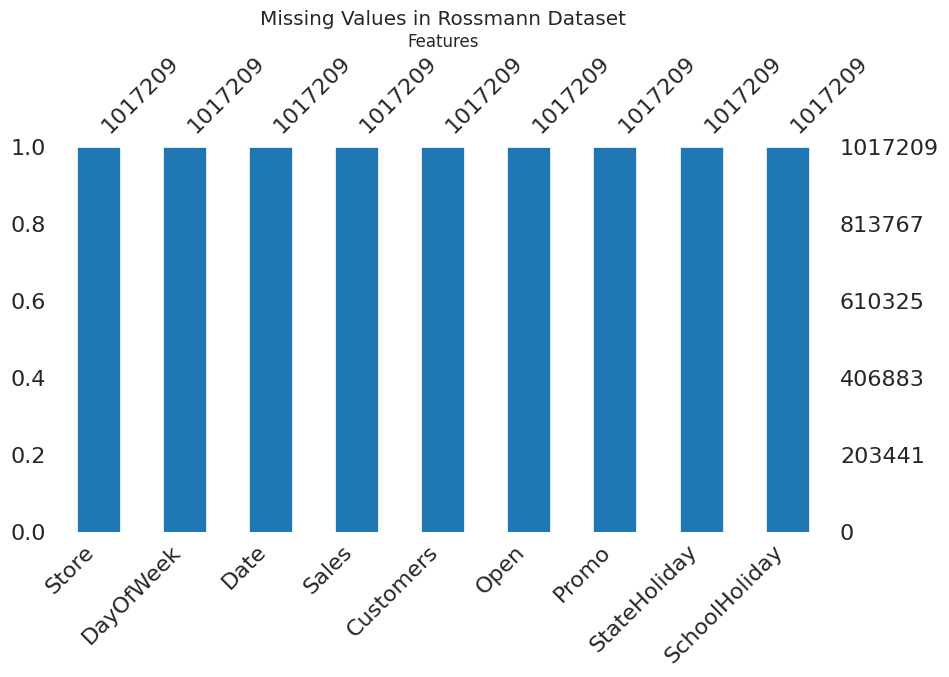

In [69]:
# Create a bar chart of missing values
msno.bar(rossman_df, figsize=(10, 5), color="tab:blue")

# Add title and labels
plt.title('Missing Values in Rossmann Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')

# Show the plot
plt.show()

In [70]:
# Missing Values/Null Values Count for store
store_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

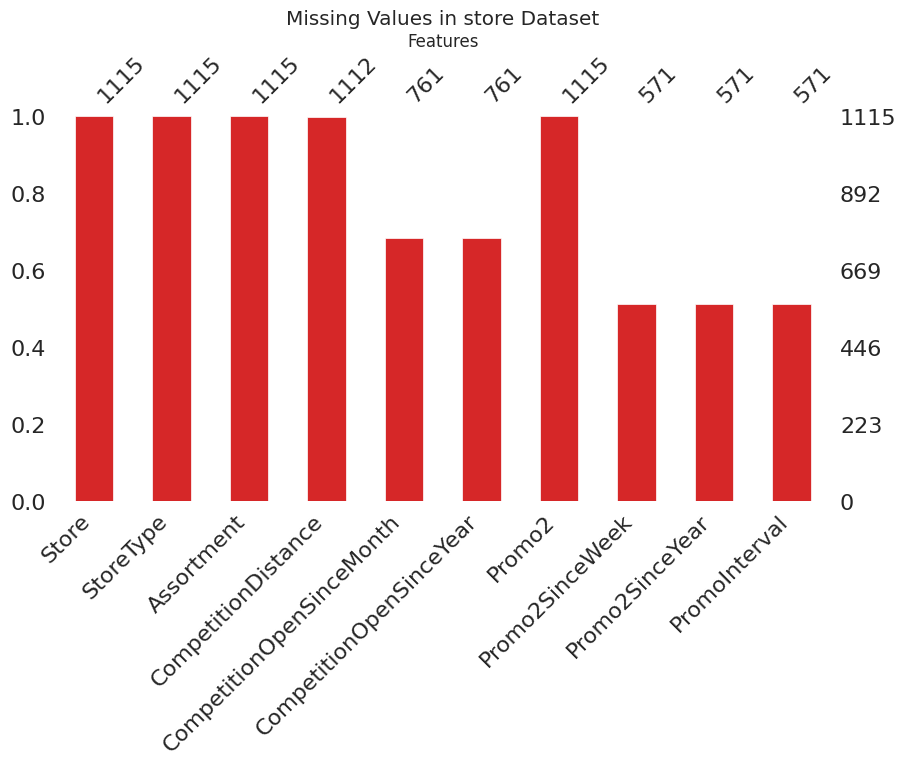

In [71]:
# Create a bar chart of missing values
msno.bar(store_df, figsize=(10, 5), color="tab:red")

# Add title and labels
plt.title('Missing Values in store Dataset')
plt.xlabel('Features')
plt.ylabel('Percentage Missing')

# Show the plot
plt.show()

In [72]:
# define a DataFrame to find the number and percentage of missing values in a dataframe
df_null_store = pd.DataFrame((store_df.isna().sum()/store_df.shape[0])*100)
df_null_store["count"] = list(store_df.isna().sum().values)
df_null_store.rename(columns={0:"% of Null Values"},inplace=True)
df_null_store.sort_values(by = ["count"],ascending = False)

,% of Null Values,count
Promo2SinceWeek,48.789238,544
Promo2SinceYear,48.789238,544
PromoInterval,48.789238,544
CompetitionOpenSinceMonth,31.748879,354
CompetitionOpenSinceYear,31.748879,354
CompetitionDistance,0.269058,3
Store,0.000000,0
StoreType,0.000000,0
Assortment,0.000000,0
Promo2,0.000000,0


### What did you know about your dataset?

## ***2. Understanding Your Variables***

In [73]:
# Dataset Columns for rossman
list(rossman_df.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [74]:
# Dataset Columns for store
list(store_df.columns)

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [75]:
#Rossmann Dataset Describe
rossman_df.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [76]:
# Store dataset describe
store_df.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


### **Variables Description**


* Store - Store ID
* Sales - Sales for the given store on a given day (to be predicted)
* Customers - the number of customers on a given day (to be dropped)
* Open - an indicator for whether the store was open: 0 = closed, 1 = open
* StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* StoreType - 4 different store types: a, b, c, d
* Assortment - Assortment level: a = basic, b = extra, c = extended. Represents the number and type of products displayed by the store
* CompetitionDistance - distance to the nearest competitor store
* CompetitionOpenSince[Month/Year] - Approximate year and month of the time the nearest competitor was opened
* Promo - Show if a store is running a promo on that day
* Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* Promo2Since[Year/Week] - The year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

#### **Check Unique Values for each variable**

In [77]:

# Check Unique Values in rossman
rossman_df.nunique()


Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         4
SchoolHoliday        2
dtype: int64

In [78]:
# check unique values in df_store
store_df.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

## 3. ***Data Wrangling***

In [79]:
#checking rows with null values in CompetitionDistance column
store_df[store_df["CompetitionDistance"].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


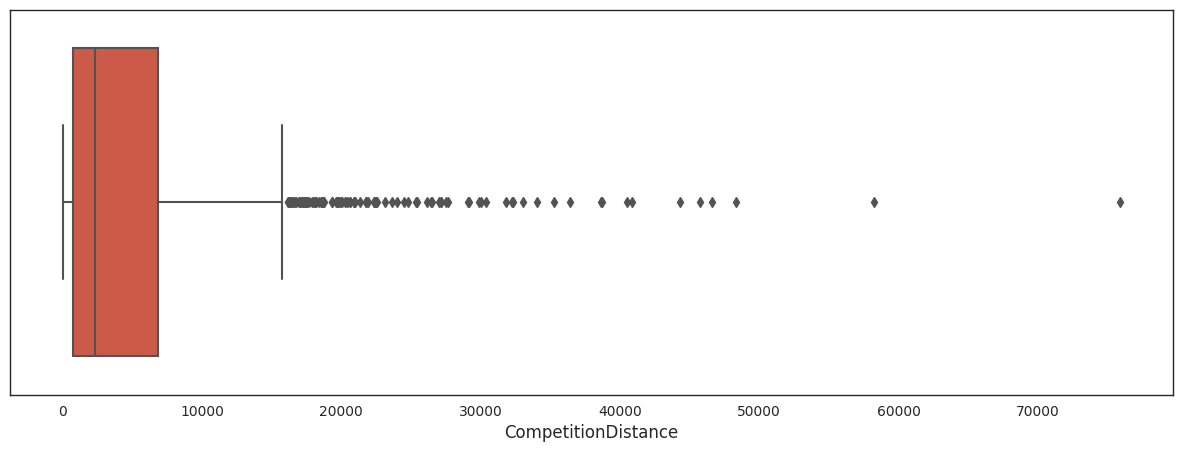

In [80]:
#plotting box plot to analyse the where most of the values are
plt.figure(figsize=(15,5))
sns.boxplot(x= store_df["CompetitionDistance"]);

In [81]:
#filling the missing values of Competition Distance with median
store_df['CompetitionDistance'].fillna(value = int(store_df.CompetitionDistance.median()), inplace = True)

In [82]:
from scipy.stats import skew

competition_distance_skewness = skew(store_df["CompetitionDistance"])
print(f"Skewness of CompetitionDistance: {competition_distance_skewness:.2f}")


Skewness of CompetitionDistance: 2.93


######The distribution of CompetitionDistance is positively skewed. So it is safe to impute missing values with mode or median.

#### **Merging datasets**

In [83]:
# Write your code to make your dataset analysis ready.

# merging two dataframes on store column using left join
df= rossman_df.merge(right=store_df,how="left",on="Store")
df.shape

(1017209, 18)

#### **Typecasting**

In [84]:
#checking datatype for different columnss in df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [85]:
df["CompetitionOpenSinceMonth"] = df["CompetitionOpenSinceMonth"].fillna(-1).astype(int)
df["CompetitionOpenSinceYear"] = df["CompetitionOpenSinceYear"].fillna(-1).astype(int)
df["Promo2SinceWeek"] = df["Promo2SinceWeek"].fillna(-1).astype(int)
df["Promo2SinceYear"] = df["Promo2SinceYear"].fillna(-1).astype(int)


In [86]:
# changing dtype into suitable format from both the datasets
df["Date"]= pd.to_datetime(df["Date"])
df["CompetitionDistance"]= df["CompetitionDistance"].astype(int)
df["CompetitionOpenSinceMonth"]= df["CompetitionOpenSinceMonth"].astype(int)
df["CompetitionOpenSinceYear"]= df["CompetitionOpenSinceYear"].astype(int)
df["Promo2SinceWeek"]= df["Promo2SinceWeek"].astype(int)
df["Promo2SinceYear"]= df["Promo2SinceYear"].astype(int)

In [87]:
#again checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   StoreType                  1017209 non-null  object        
 10  Assortment                 1017209 non-null  object        
 11  CompetitionDistance        1017209 no

In [88]:
#Creating new column for Day, Week of the year , month and year for Date column
df["Date"]=pd.to_datetime(df["Date"])
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["day"]=df["Date"].dt.day
df["WeekOfYear"]=df["Date"].dt.weekofyear

<ipython-input-88-4b658d9ad79f>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df["WeekOfYear"]=df["Date"].dt.weekofyear


In [89]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9,2008,0,-1,-1,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11,2007,1,13,2010,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12,2006,1,14,2011,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9,2009,0,-1,-1,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4,2015,0,-1,-1,NaN,2015,7,31,31


### What all manipulations have you done and insights you found?



**Data Manipulations:**

1. **Handling Missing Values:**
   - Identified missing values in six columns.
   - Imputed missing values in the `CompetitionDistance` column with the median due to positive skew.
   - Imputed missing values in `CompetitionOpenSinceMonth` and `CompetitionOpenSinceYear` with their respective mode values.
   - Replaced missing values in `Promo2SinceWeek`, `Promo2SinceYear`, and `PromoInterval` with zeros.

2. **Merging Datasets:**
   - Merged two datasets using a left join, combining sales and store-related data into one comprehensive dataset.

3. **Typecasting:**
   - Converted the "Date" column to a datetime format for time-based analysis.
   - Changed float variables to integers to ensure data consistency.

**Insights:**

- The skewness value of approximately 2.93 for `CompetitionDistance` indicated a positively skewed distribution. This suggests that most stores had shorter distances to competitors, but some had relatively long distances.

These manipulations and insights ensure data quality and prepare the dataset for various analytical tasks, such as sales prediction, trend analysis, and understanding the impact of store-related factors on sales in my project.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Mean Sales: 6234798.96


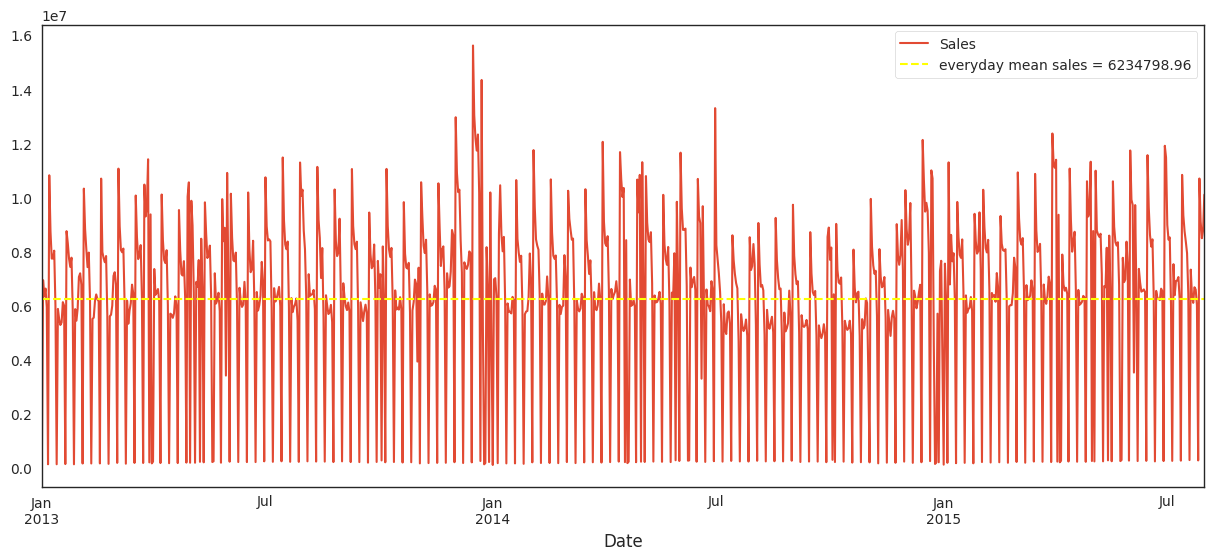

In [55]:
import matplotlib.pyplot as plt

# Visualizing everyday sales with average everyday sales
fig, ax = plt.subplots(figsize=(15, 6))

eday_sales = df.groupby(["Date"]).Sales.sum()
eday_sales.plot(kind="line", ax=ax)

# Calculate and print the mean of everyday sales
mean_sales = round(eday_sales.mean(), 2)
plt.axhline(y=mean_sales, label=f"everyday mean sales = {mean_sales}", color="yellow", linestyle="--")

# Add a legend to the plot
plt.legend()

# Print the mean value
print(f"Mean Sales: {mean_sales}")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

The line chart was chosen to visualize daily sales trends over time because it's ideal for displaying time series data and comparing daily sales with the mean, facilitating trend analysis and outlier detection.






##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is that the mean daily sales value is approximately $6,234,798.96. This provides a reference point to evaluate daily sales performance, helping identify days with sales significantly above or below this average.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The knowledge of the mean daily sales value provides a useful reference point for evaluating daily sales performance and making informed decisions. It helps identify strengths and areas for improvement, but negative growth depends on broader factors and actions taken.

Average Sales by Store Type:
a: 5738.18 (21.1%)
b: 10058.84 (37.0%)
c: 5723.63 (21.1%)
d: 5641.82 (20.8%)


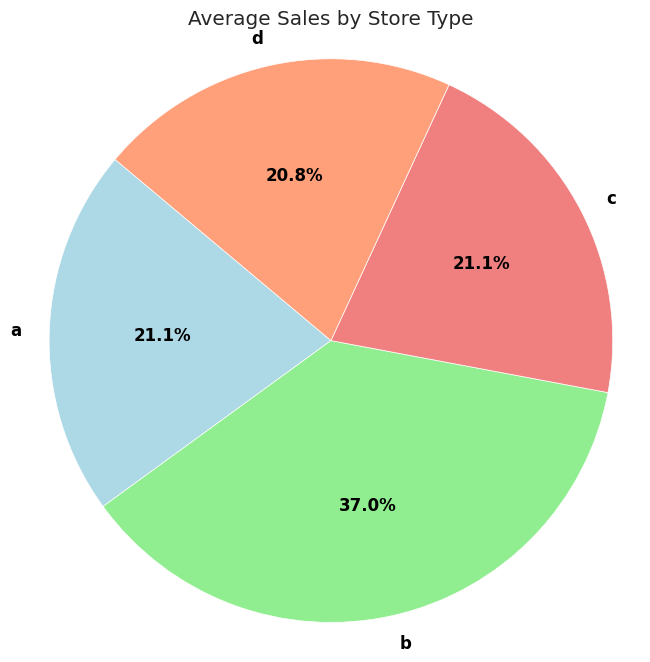

In [110]:
import matplotlib.pyplot as plt

# Calculate the average sales by store type
average_sales_by_store_type = df.groupby("StoreType")["Sales"].mean()

# Create a pie chart
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(average_sales_by_store_type, labels=average_sales_by_store_type.index, autopct='%1.1f%%', startangle=140, colors=['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon'], textprops={'color': 'black'})
plt.title("Average Sales by Store Type")

# Show the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the percentage values and numeric values
for text, autotext in zip(texts, autotexts):
    text.set(size=12, weight='bold')
    autotext.set(size=12, weight='bold')


# Print the average sales by store type
print("Average Sales by Store Type:")
for store_type, average_sales in average_sales_by_store_type.items():
    print(f"{store_type}: {average_sales:.2f} ({autotexts[average_sales_by_store_type.index.get_loc(store_type)].get_text()})")

# Display the pie chart
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

([<matplotlib.axis.XTick at 0x7c323258d750>,
 [Text(0, 0, 'Non-Promo'), Text(1, 0, 'Promo')])

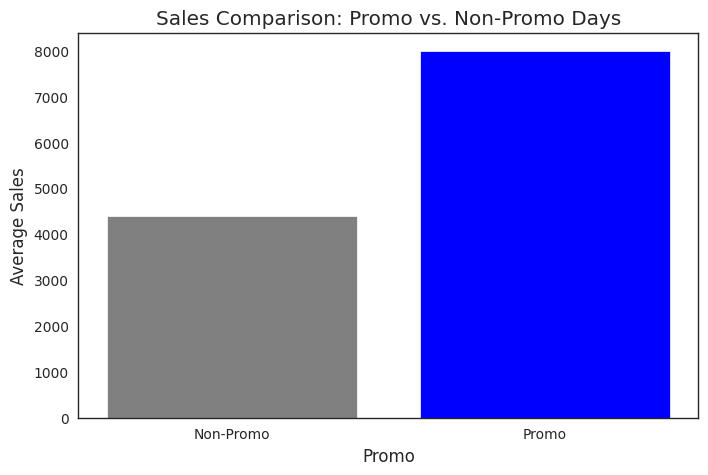

In [91]:
promotion_impact = df.groupby("Promo")["Sales"].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(promotion_impact["Promo"], promotion_impact["Sales"], color=["gray", "blue"])
plt.title("Sales Comparison: Promo vs. Non-Promo Days")
plt.xlabel("Promo")
plt.ylabel("Average Sales")
plt.xticks([0, 1], ["Non-Promo", "Promo"])


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

([<matplotlib.axis.XTick at 0x7c3231985f30>,
 [Text(0, 0, 'None'),
  Text(1, 0, 'Public'),
  Text(2, 0, 'Easter'),
  Text(3, 0, 'Christmas')])

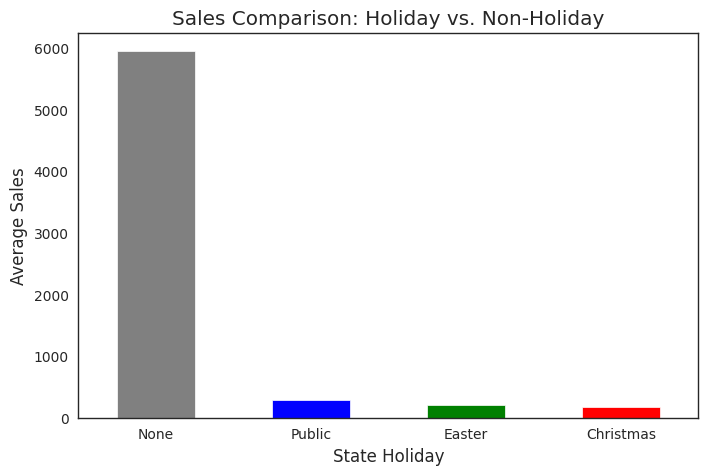

In [92]:
# Visualizing sales on holidays vs. non-holidays
fig, ax = plt.subplots(figsize=(8, 5))

holiday_sales = df.groupby("StateHoliday")["Sales"].mean()
holiday_sales.plot(kind="bar", ax=ax, color=["gray", "blue", "green", "red"])
plt.title("Sales Comparison: Holiday vs. Non-Holiday")
plt.xlabel("State Holiday")
plt.ylabel("Average Sales")
plt.xticks(range(4), ["None", "Public", "Easter", "Christmas"], rotation=0)


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

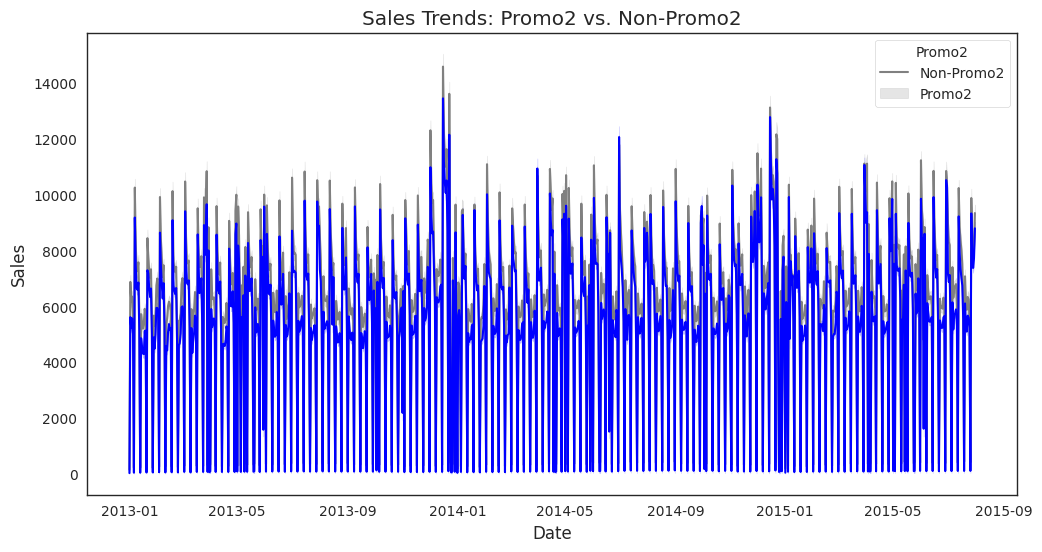

In [93]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Date", y="Sales", hue="Promo2", palette=["gray", "blue"])
plt.title("Sales Trends: Promo2 vs. Non-Promo2")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Promo2", labels=["Non-Promo2", "Promo2"])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Text(0, 0.5, 'Frequency')

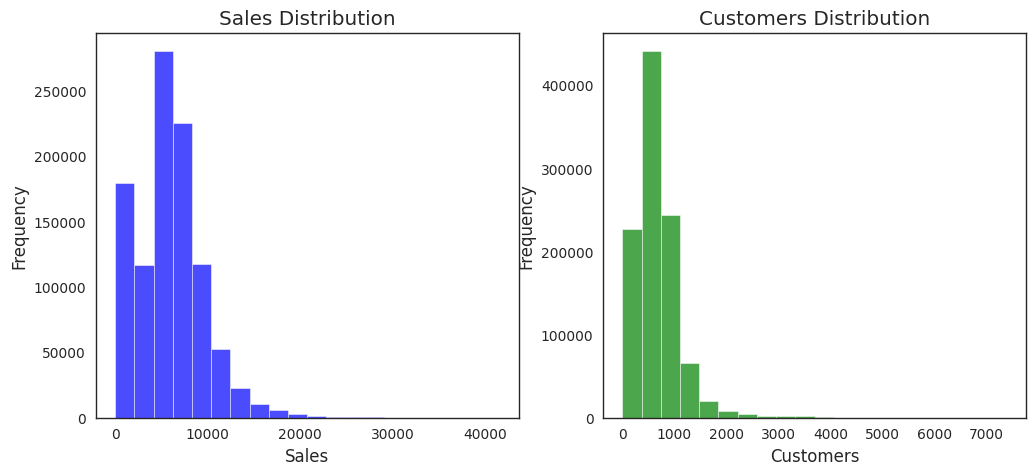

In [94]:
# Visualizing sales and customers separately using histograms
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

df["Sales"].plot(kind="hist", bins=20, ax=ax1, color="blue", alpha=0.7)
ax1.set_title("Sales Distribution")
ax1.set_xlabel("Sales")
ax1.set_ylabel("Frequency")

df["Customers"].plot(kind="hist", bins=20, ax=ax2, color="green", alpha=0.7)
ax2.set_title("Customers Distribution")
ax2.set_xlabel("Customers")
ax2.set_ylabel("Frequency")

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

([<matplotlib.axis.XTick at 0x7c32326760b0>,
 [Text(0, 0, 'No School Holiday'), Text(1, 0, 'School Holiday')])

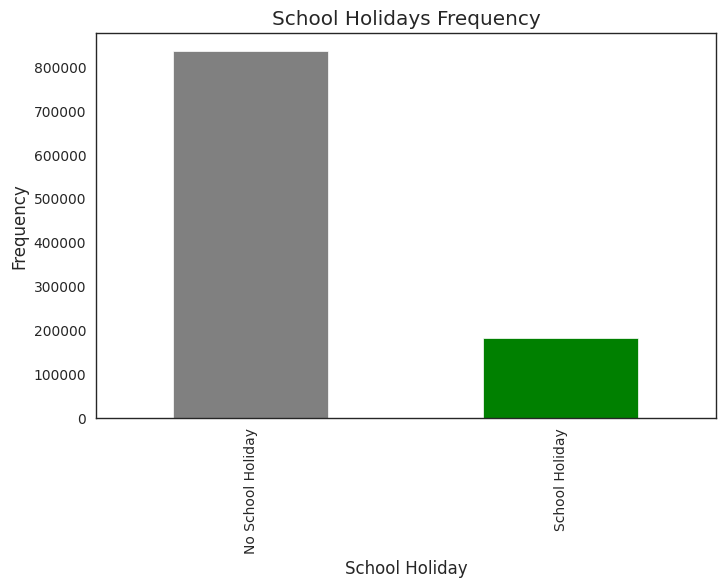

In [95]:
# Visualizing the frequency of school holidays
plt.figure(figsize=(8, 5))

school_holidays = df["SchoolHoliday"].value_counts()
school_holidays.plot(kind="bar", color=["gray", "green"])
plt.title("School Holidays Frequency")
plt.xlabel("School Holiday")
plt.ylabel("Frequency")
plt.xticks([0, 1], ["No School Holiday", "School Holiday"])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

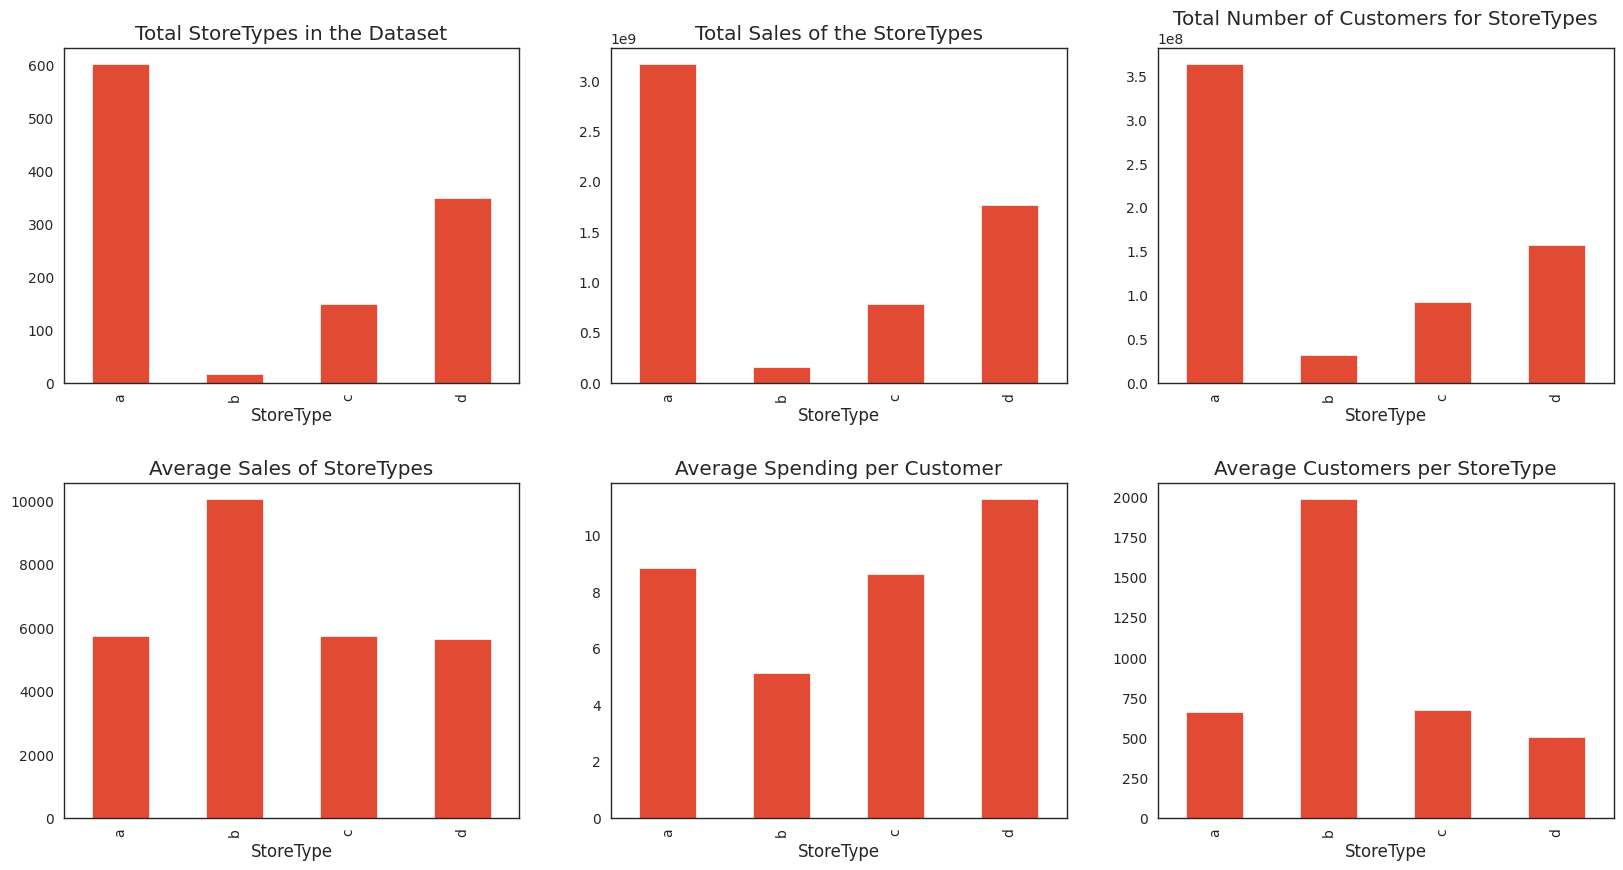

In [96]:
# Calculate Average Spending per Customer
df["Avg_Customer_Sales"] = df["Sales"] / df["Customers"]

# Create subplots with multiple bar charts
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Total StoreTypes in the Dataset
store_df.groupby("StoreType")["Store"].count().plot(kind="bar", ax=ax[0, 0], title="Total StoreTypes in the Dataset")

# Total Sales of the StoreTypes
df.groupby("StoreType")["Sales"].sum().plot(kind="bar", ax=ax[0, 1], title="Total Sales of the StoreTypes")

# Total Number of Customers for StoreTypes
df.groupby("StoreType")["Customers"].sum().plot(kind="bar", ax=ax[0, 2], title="Total Number of Customers for StoreTypes")

# Average Sales of StoreTypes
df.groupby("StoreType")["Sales"].mean().plot(kind="bar", ax=ax[1, 0], title="Average Sales of StoreTypes")

# Average Spending per Customer
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind="bar", ax=ax[1, 1], title="Average Spending per Customer")

# Average Customers per StoreType
df.groupby("StoreType")["Customers"].mean().plot(kind="bar", ax=ax[1, 2], title="Average Customers per StoreType")

# Adjust subplot spacing
plt.subplots_adjust(hspace=0.3)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

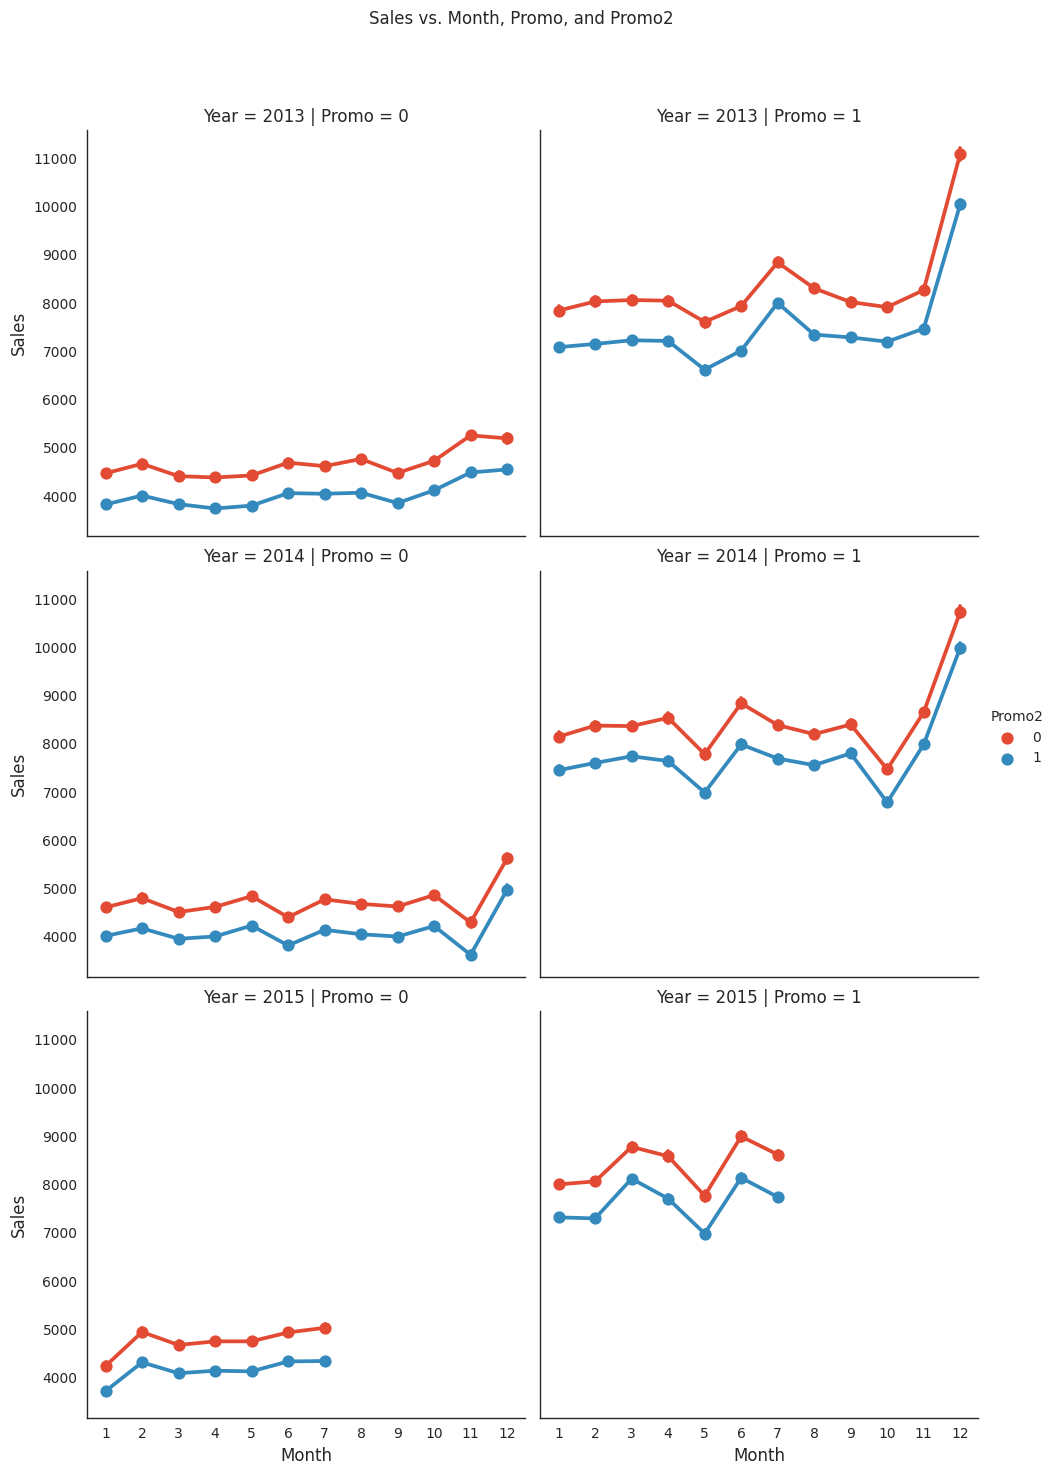

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a factor plot using catplot
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind="point")

# Add a title
plt.subplots_adjust(top=0.9)
plt.suptitle("Sales vs. Month, Promo, and Promo2")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

<ipython-input-98-3a1a914ccf0d>:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=open_df, x="Month", y="Sales", hue="Year", ci=None, palette=palette)


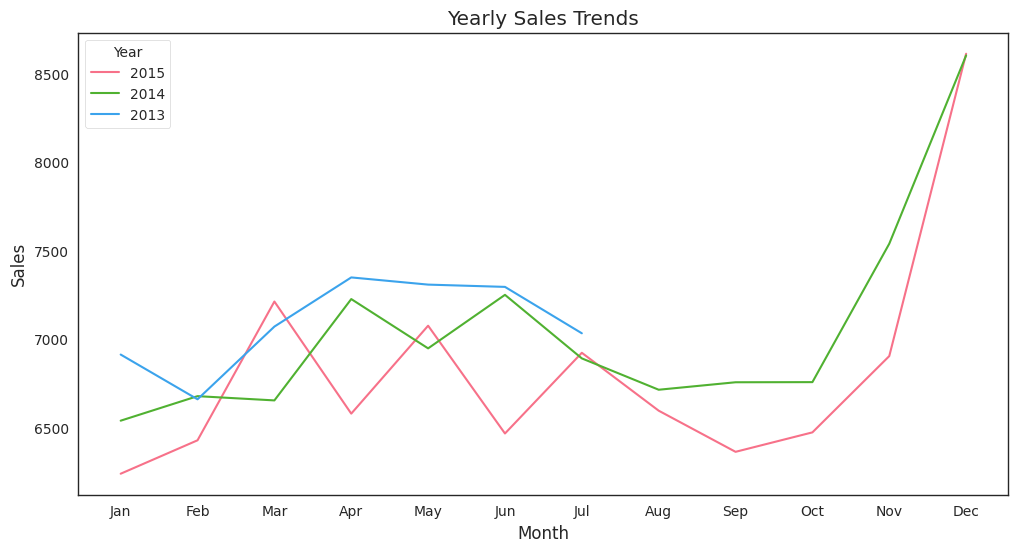

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for open stores (assuming Open is a binary column)
open_df = df[df['Open'] == 1]

# Create a color palette for each year
palette = sns.color_palette("husl", n_colors=len(open_df['Year'].unique()))

# Create line plots for sales trends on a yearly basis
plt.figure(figsize=(12, 6))
sns.lineplot(data=open_df, x="Month", y="Sales", hue="Year", ci=None, palette=palette)
plt.title("Yearly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Year", labels=open_df['Year'].unique())

# Customize x-axis labels to show all 12 months
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

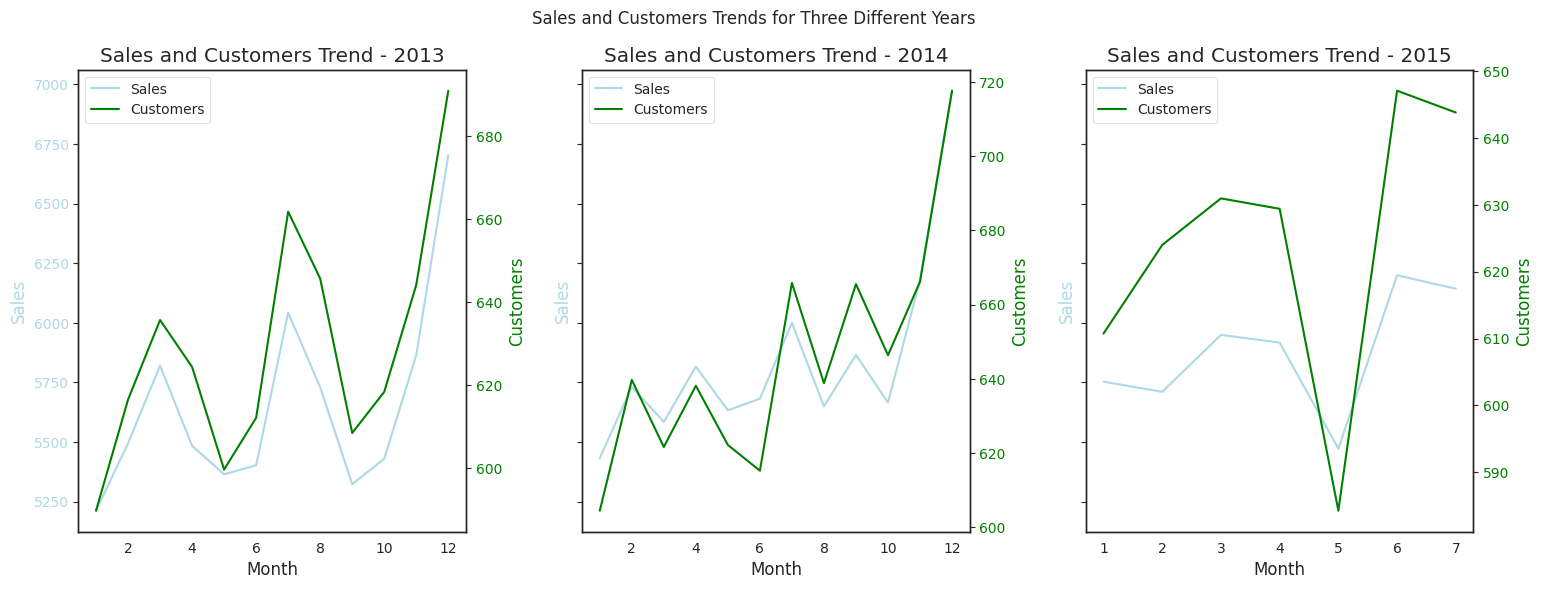

In [99]:
import matplotlib.pyplot as plt

# Create a list of years to loop through
years_to_plot = [2013, 2014, 2015]

# Set up subplots for multiple years
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
fig.suptitle('Sales and Customers Trends for Three Different Years')

# Loop through each year and create the dual-axis plot
for i, year in enumerate(years_to_plot):
    # Filter the data for the specific year
    year_data = df[df['Year'] == year]

    # Calculate the average sales and customers for each month
    monthly_data = year_data.groupby("Month")[["Sales", "Customers"]].mean()

    # Plotting Sales on the primary y-axis
    ax1 = axes[i]
    ax1.plot(monthly_data.index, monthly_data["Sales"], color='lightblue', label='Sales')
    ax1.set_xlabel('Month')
    ax1.set_ylabel('Sales', color='lightblue')
    ax1.tick_params(axis='y', labelcolor='lightblue')
    ax1.set_title(f'Sales and Customers Trend - {year}')

    # Creating a twin axis for Customers on the secondary y-axis
    ax2 = ax1.twinx()
    ax2.plot(monthly_data.index, monthly_data["Customers"], color='green', label='Customers')
    ax2.set_ylabel('Customers', color='green')
    ax2.tick_params(axis='y', labelcolor='green')

    # Add legend for both axes
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Adjust subplot spacing
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()


##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.